# Clothing Fit / json Processing
## (Self-Guided Project)

## by Justin Sierchio

In this project, we will be looking at using clothing fit data to learn about json processing.

This data is in .csv file format and is from Kaggle at: https://www.kaggle.com/soujanyag/modcloth-data-preprocessing-for-beginner. More information related to the dataset can be found at the same link.

Note: this is a self-guided project following the notebook/tutorial provided by Soujanya G at Kaggle.

## Notebook Initialization

In [1]:
# Import Relevant Libraries
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

print('Initial libraries loaded into workspace!')

Initial libraries loaded into workspace!


In [2]:
# Upload Datasets for Study
mc_data = pd.read_json('modcloth_final_data.json', lines=True)

print('Dataset uploaded!');

Dataset uploaded!


Let's display the first 5 rows for this dataset.

In [3]:
# Display 1st 5 rows of modified clothing dataset
mc_data.head()

,item_id,waist,size,quality,cup size,hips,bra size,category,bust,height,user_name,length,fit,user_id,shoe size,shoe width,review_summary,review_text
0,123373,29.0,7,5.0,d,38.0,34.0,new,36,5ft 6in,Emily,just right,small,991571,NaN,NaN,NaN,NaN
1,123373,31.0,13,3.0,b,30.0,36.0,new,NaN,5ft 2in,sydneybraden2001,just right,small,587883,NaN,NaN,NaN,NaN
2,123373,30.0,7,2.0,b,NaN,32.0,new,NaN,5ft 7in,Ugggh,slightly long,small,395665,9.0,NaN,NaN,NaN
3,123373,NaN,21,5.0,dd/e,NaN,NaN,new,NaN,NaN,alexmeyer626,just right,fit,875643,NaN,NaN,NaN,NaN
4,123373,NaN,18,5.0,b,NaN,36.0,new,NaN,5ft 2in,dberrones1,slightly long,small,944840,NaN,NaN,NaN,NaN


## Exploratory Data Analysis

In order to avoid potential coding errors, a good practice is to make sure all the names of the columns use underscores rather than spaces. We can accomplish this task by modifying the column names accordingly.

In [4]:
# Modify Column Names
mc_data.columns = ['item_id', 'waist', 'mc_size', 'quality', 'cup_size', 'hips', 'bra_size', 'category', 'bust', 'height', 
                   'user_name', 'length', 'fit', 'user_id', 'shoe_size', 'shoe_width', 'review_summary', 'review_test']

Now let's check the overall information for each column.

In [5]:
mc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82790 entries, 0 to 82789
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   item_id         82790 non-null  int64  
 1   waist           2882 non-null   float64
 2   mc_size         82790 non-null  int64  
 3   quality         82722 non-null  float64
 4   cup_size        76535 non-null  object 
 5   hips            56064 non-null  float64
 6   bra_size        76772 non-null  float64
 7   category        82790 non-null  object 
 8   bust            11854 non-null  object 
 9   height          81683 non-null  object 
 10  user_name       82790 non-null  object 
 11  length          82755 non-null  object 
 12  fit             82790 non-null  object 
 13  user_id         82790 non-null  int64  
 14  shoe_size       27915 non-null  float64
 15  shoe_width      18607 non-null  object 
 16  review_summary  76065 non-null  object 
 17  review_test     76065 non-null 

We notice that some of the columns have sparse data. To determine the exact amounts, let's use the 'isnull' method.

In [6]:
# Find the exact amounts of sparse data
missing_data_sum = mc_data.isnull().sum()
missing_data = pd.DataFrame({'total_missing_values': missing_data_sum,'percentage_of_missing_values': (missing_data_sum/mc_data.shape[0])*100})
missing_data

,total_missing_values,percentage_of_missing_values
item_id,0,0.000000
waist,79908,96.518903
mc_size,0,0.000000
quality,68,0.082136
cup_size,6255,7.555260
hips,26726,32.281677
bra_size,6018,7.268994
category,0,0.000000
bust,70936,85.681846
height,1107,1.337118


According to this output, only 6/18 columns have complete data. 5/18 columns are missing more than 60% of the values.

Now let's take a look at the number of unique observations. In other words, how many different possible values for each variable column exist?

In [7]:
# Find the number of unique variables
mc_data.nunique()

item_id            1378
waist                31
mc_size              29
quality               5
cup_size             12
hips                 31
bra_size             11
category              7
bust                 40
height               41
user_name         32429
length                5
fit                   3
user_id           47958
shoe_size            15
shoe_width            3
review_summary    61713
review_test       73313
dtype: int64

Now let's look at the variables that are not as unique and plot their distributions. To do this, we will construct a function called "countplot."

In [8]:
# Create Function called 'countplot'
def countplot(independent_features):
  plt.figure(figsize=(25, 25))
  for loc, feature in enumerate(independent_features):
    ax = plt.subplot(3, 4, loc+1)
    ax.set_xlabel('{}'.format(feature), fontsize=10)
    chart = sns.countplot(mc_data[feature])
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
  return None

Now we upload the columns with less unique data and plot their distributions.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\si

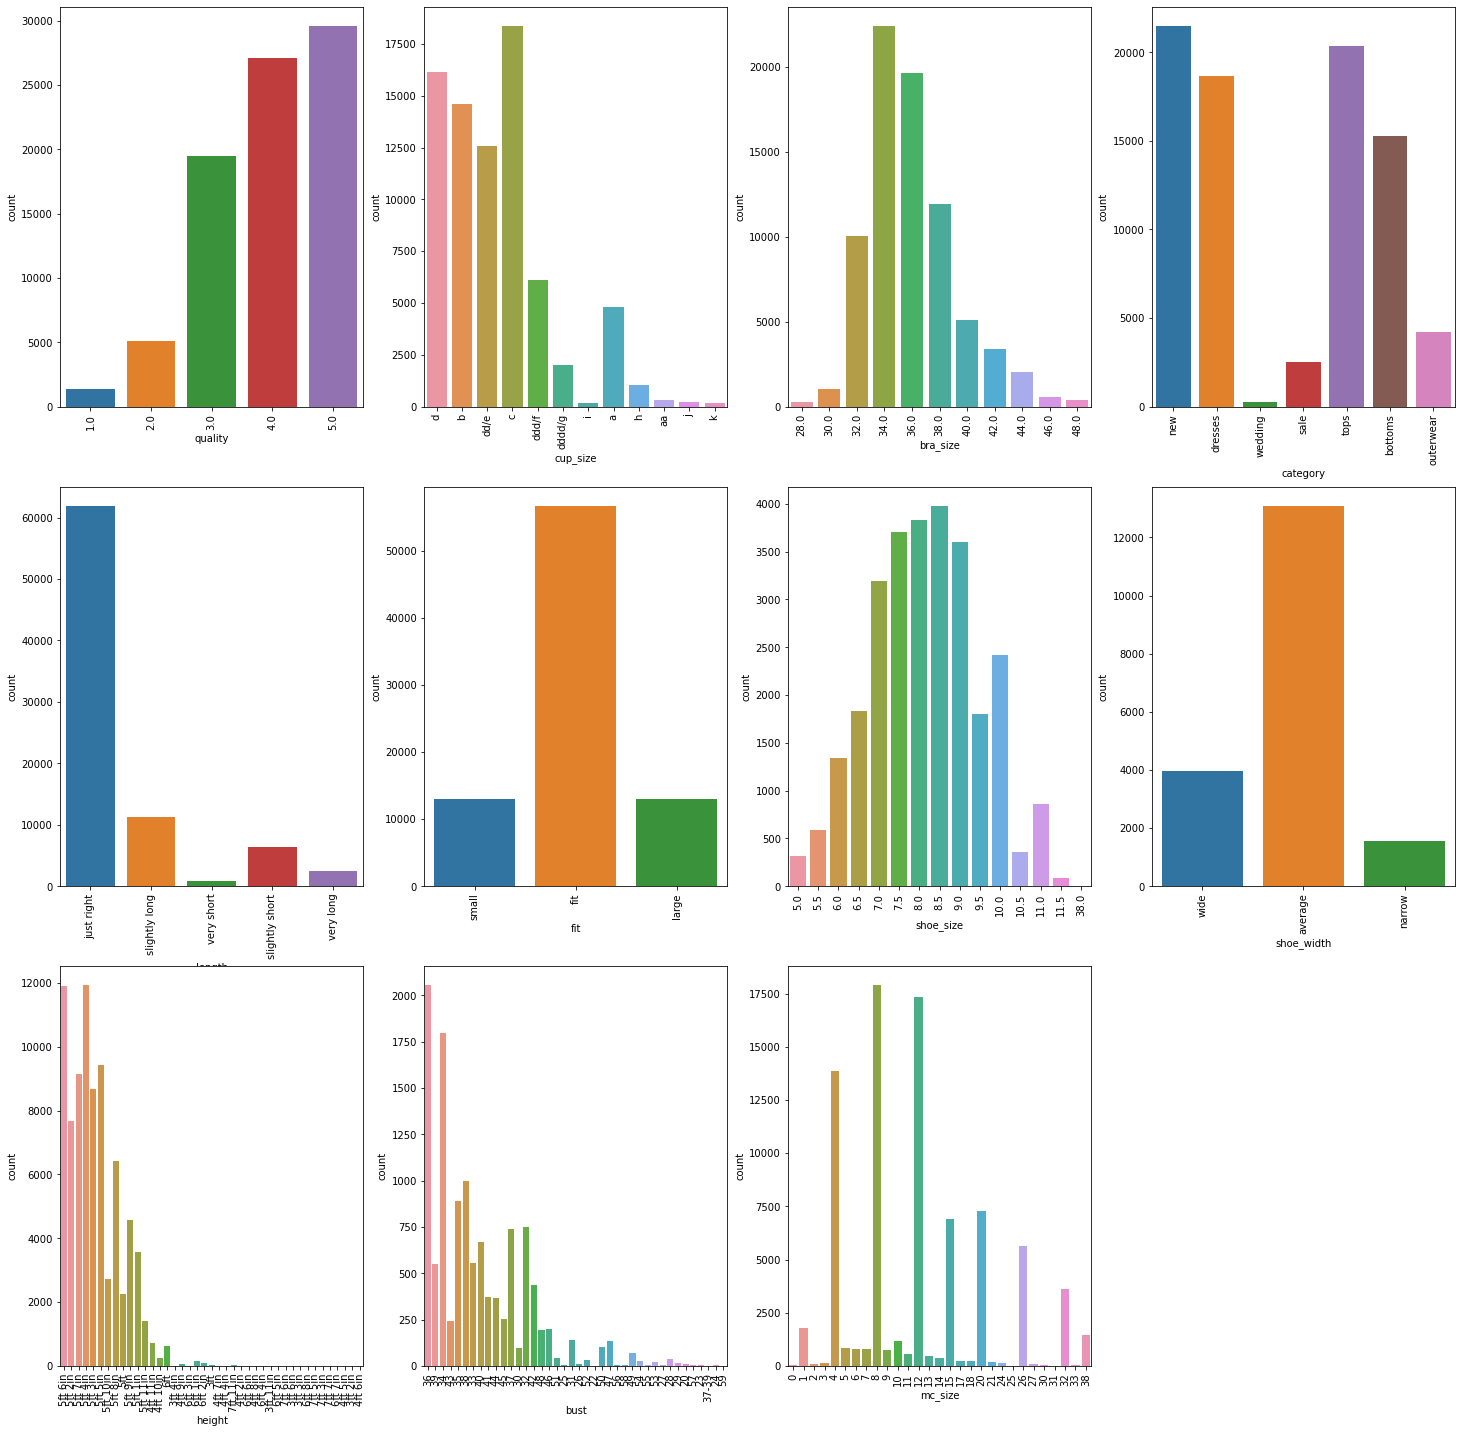

In [9]:
unique_data = ['quality', 'cup_size', 'bra_size', 'category', 'length', 'fit',  'shoe_size', 'shoe_width', 'height', 'bust', 'mc_size']
countplot(unique_data)

Looking at this data, we can make a few observations:

<ul>
    <li>cup_size - measurements represented in a specific format</li>
    <li>shoe_size - value of 38 is an outlier</li>
    <li>height - several outliers (so it might be worth converting from categorical data --> numerical values</li>
    <li>bust - replace the values 37-39 with the mean</li>
    <li>shoe_width, category, length, fit, height - these are all categorical data</li>
</ul>

Let's replace the bust data with the mean value.

In [10]:
# Replace bust values of 37-39 with 38 [mean]
mc_data.at[mc_data[mc_data.bust == '37-39'].index[0],'bust'] = '38'

Lastly, for the purposes of keeping the data in one unit system, let's convert all the US/English units to Metric.

In [11]:
# Create a US to Metric conversion function
def height_in_cms(ht):
  if ht.lower() != 'nan':
    ht = ht.replace('ft','').replace('in', '')
    h_ft = int(ht.split()[0])
    if len(ht.split()) > 1:
      h_inch = int(ht.split()[1])
    else:
      h_inch = 0
    h_inch += h_ft * 12
    h_cm = round(h_inch * 2.54, 1)
    return h_cm

In [12]:
# Apply Metric conversion function to 'height' variable
mc_data.height = mc_data.height.astype(str).apply(height_in_cms)
mc_data.head()

,item_id,waist,mc_size,quality,cup_size,hips,bra_size,category,bust,height,user_name,length,fit,user_id,shoe_size,shoe_width,review_summary,review_test
0,123373,29.0,7,5.0,d,38.0,34.0,new,36,167.6,Emily,just right,small,991571,NaN,NaN,NaN,NaN
1,123373,31.0,13,3.0,b,30.0,36.0,new,NaN,157.5,sydneybraden2001,just right,small,587883,NaN,NaN,NaN,NaN
2,123373,30.0,7,2.0,b,NaN,32.0,new,NaN,170.2,Ugggh,slightly long,small,395665,9.0,NaN,NaN,NaN
3,123373,NaN,21,5.0,dd/e,NaN,NaN,new,NaN,NaN,alexmeyer626,just right,fit,875643,NaN,NaN,NaN,NaN
4,123373,NaN,18,5.0,b,NaN,36.0,new,NaN,157.5,dberrones1,slightly long,small,944840,NaN,NaN,NaN,NaN


At this juncture, let's look at handling any outliers via mean imputation.

In [13]:
# Removing outliers in 'height' column and replacing them with mean values
mc_data.height.fillna(value=mc_data.height.mean(), inplace=True)
mc_data.height.isnull().sum()

0

Now let's plot any outliers.

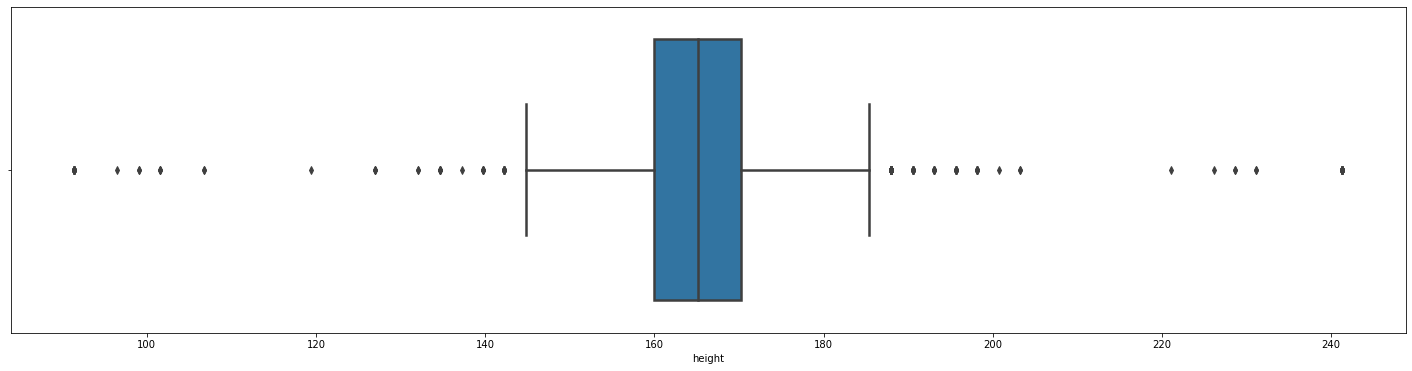

In [14]:
# Create a plot outlier function and apply it to the height column
def plot_outlier(feature):
  plt.figure(figsize=(25, 6))
  ax = sns.boxplot(x=feature, linewidth=2.5)
plot_outlier(mc_data.height)

Now let's check the upper and lower ranges for any outliers.

In [15]:
# Create a plot outlier range function
def get_outliers_range(datacolumn):
  sorted(datacolumn)
  Q1,Q3 = np.percentile(datacolumn , [25,75])
  IQR = Q3 - Q1
  lower_range = Q1 - (1.5 * IQR)
  upper_range = Q3 + (1.5 * IQR)
  return lower_range,upper_range

In [16]:
# Find the outliers for the upper and lower ranges
ht_lower_range,ht_upper_range = get_outliers_range(mc_data.height)
ht_lower_range,ht_upper_range

(144.70000000000002, 185.49999999999997)

The conclusion at this stage is that, using the inter-quartile range (IQR) method, outliers are present above 185.49 or below 144.70.